In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nft_data = pd.read_csv("NFT_Top_Collections.csv")

In [4]:
nft_data.head()

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969.91560,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...
1,1,Skeleton Crew Skulls,11381.25,1.670995e+06,106.656000,15659.23392,2075,0.67,98.3694,5.484940,805.298855,103,132,78.03,NaN,https://skeletoncrew.rip/,https://content.solsea.io/files/thumbnail/1633...
2,2,Flippies,6732.19,9.884201e+05,1663.863158,244288.38880,1504,0.80,117.4560,4.476190,657.194239,905,1638,55.25,NaN,https://www.flippies.art/,https://content.solsea.io/files/thumbnail/1632...
3,3,Meerkat Millionaires Country Club,3734.76,5.483375e+05,90.275000,13254.17550,395,3.79,556.4478,9.455089,1388.196109,19,23,82.61,NaN,https://meerkatmillionaires.club/,https://content.solsea.io/files/thumbnail/1632...
4,4,Stylish Studs,3191.15,4.685246e+05,165.000000,24225.30000,729,4.30,631.3260,4.377435,642.694984,28,50,56.00,NaN,https://stylishstuds.io,https://content.solsea.io/files/thumbnail/1632...


In [5]:
nft_data.isnull().sum()

Index                  0
Name                   0
Volume                 0
Volume_USD             0
Market_Cap             0
Market_Cap_USD         0
Sales                  0
Floor_Price           48
Floor_Price_USD       48
Average_Price          0
Average_Price_USD      0
Owners                 0
Assets                 0
Owner_Asset_Ratio     49
Category             282
Website              111
Logo                   1
dtype: int64

#### Step 1: Data Preparation - Handling missing values and cleaning


In [6]:
# Handle missing values
nft_data['Floor_Price'].fillna(nft_data['Floor_Price'].median(), inplace=True)
nft_data['Floor_Price_USD'].fillna(nft_data['Floor_Price_USD'].median(), inplace=True)
nft_data['Owner_Asset_Ratio'].fillna(nft_data['Owner_Asset_Ratio'].median(), inplace=True)
nft_data['Category'].fillna('Unknown', inplace=True)

# Drop unnecessary columns for analysis
columns_to_drop = ['Website', 'Logo']
nft_data_cleaned = nft_data.drop(columns=columns_to_drop)

# Display cleaned data
nft_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              592 non-null    int64  
 1   Name               592 non-null    object 
 2   Volume             592 non-null    float64
 3   Volume_USD         592 non-null    float64
 4   Market_Cap         592 non-null    float64
 5   Market_Cap_USD     592 non-null    float64
 6   Sales              592 non-null    int64  
 7   Floor_Price        592 non-null    float64
 8   Floor_Price_USD    592 non-null    float64
 9   Average_Price      592 non-null    float64
 10  Average_Price_USD  592 non-null    float64
 11  Owners             592 non-null    int64  
 12  Assets             592 non-null    int64  
 13  Owner_Asset_Ratio  592 non-null    float64
 14  Category           592 non-null    object 
dtypes: float64(9), int64(4), object(2)
memory usage: 69.5+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_8020\1511710113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nft_data['Floor_Price'].fillna(nft_data['Floor_Price'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8020\1511710113.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [7]:
nft_data_cleaned.isnull().sum()

Index                0
Name                 0
Volume               0
Volume_USD           0
Market_Cap           0
Market_Cap_USD       0
Sales                0
Floor_Price          0
Floor_Price_USD      0
Average_Price        0
Average_Price_USD    0
Owners               0
Assets               0
Owner_Asset_Ratio    0
Category             0
dtype: int64

#### Sentiment Analysis: Proxy sentiment created from the Category column.

In [8]:
# Convert Category to numerical format
nft_data_cleaned['Category_Code'] = nft_data_cleaned['Category'].astype('category').cat.codes

# Display unique categories and their codes
nft_data_cleaned[['Category', 'Category_Code']].drop_duplicates()


,Category,Category_Code
0,"Collectibles,Digital,Privilege",96
1,Unknown,261
5,"Art,Collectibles,Graphics,2D,Image",36
9,"3D,PFP,Metaverse,Art,Collectibles",16
12,"Digital,Metaverse,Art,Picture,Image",196
...,...,...
578,"Digital,Metaverse,Collectibles,Art,3D",198
580,"Digital,Physical,Art,Painting",207
581,"Digital,Privilege,3D,Video,Collectibles",209
589,"2D,Art,Digital,Collectibles,Drawing",1


#### Step 3: Data Visualization - Plots to explore trends in pricing and sentiment.

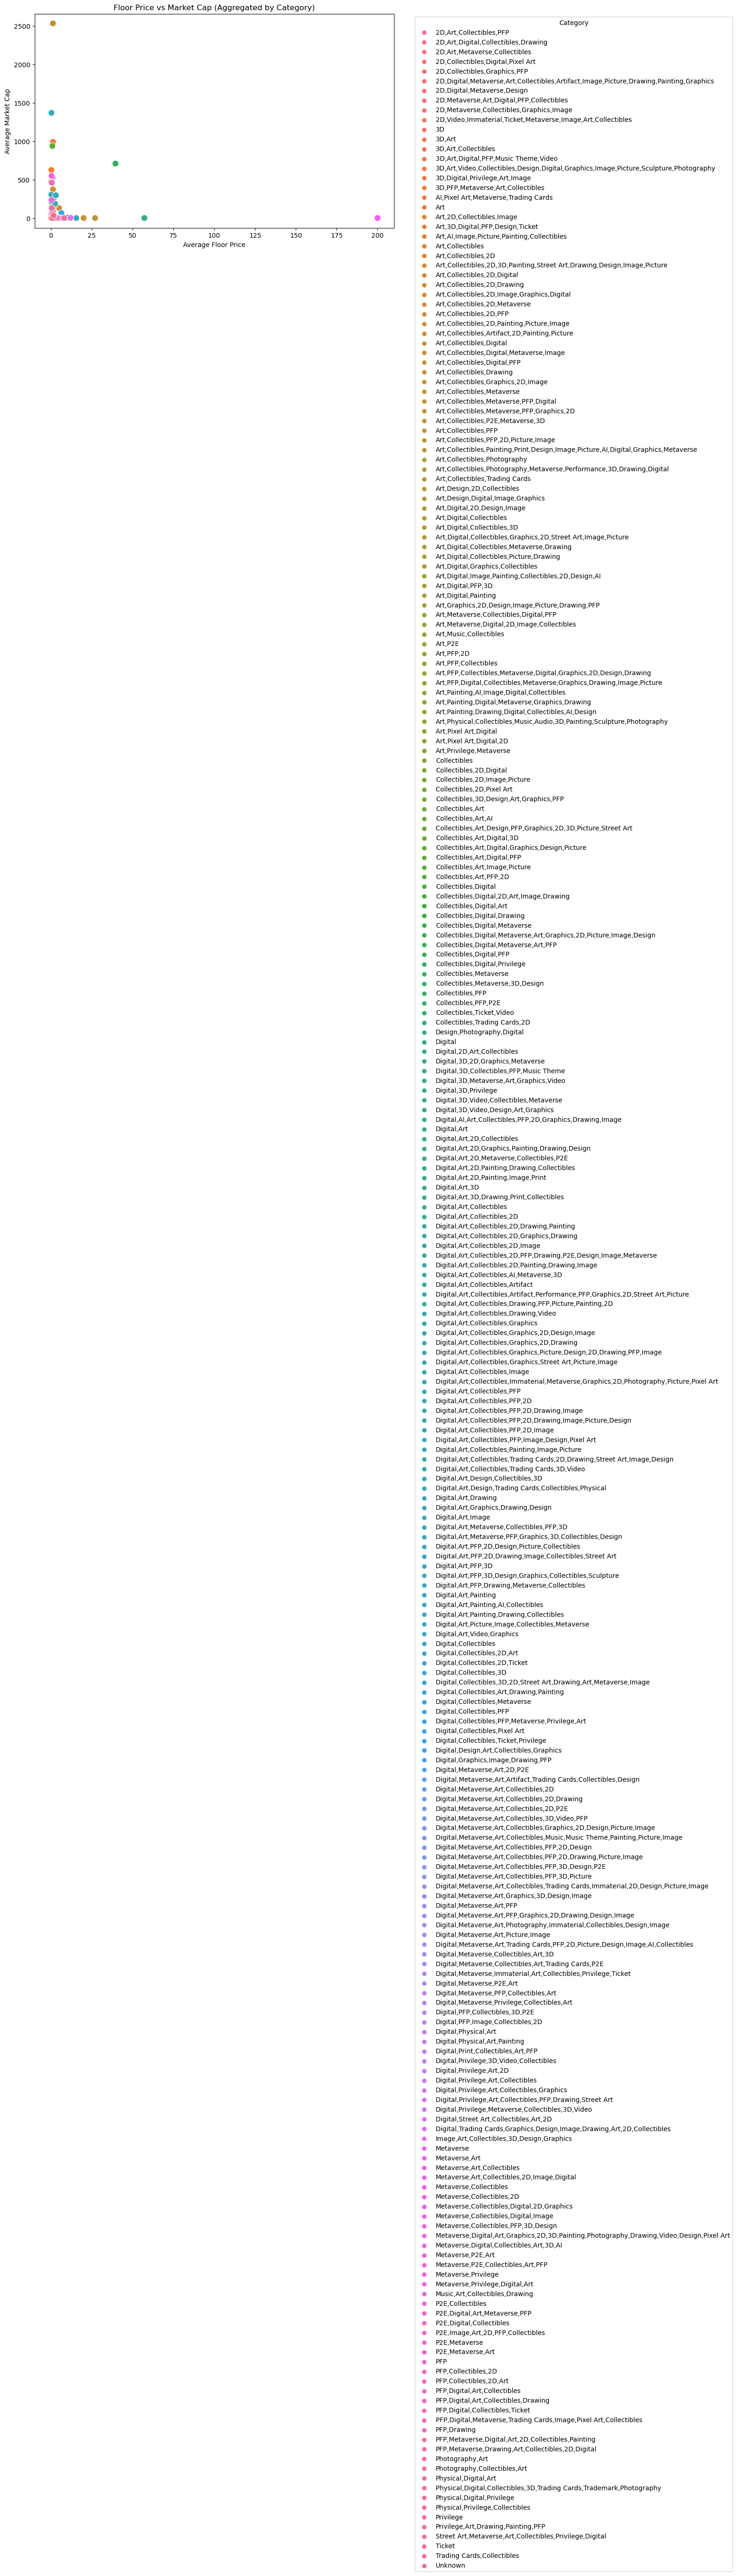

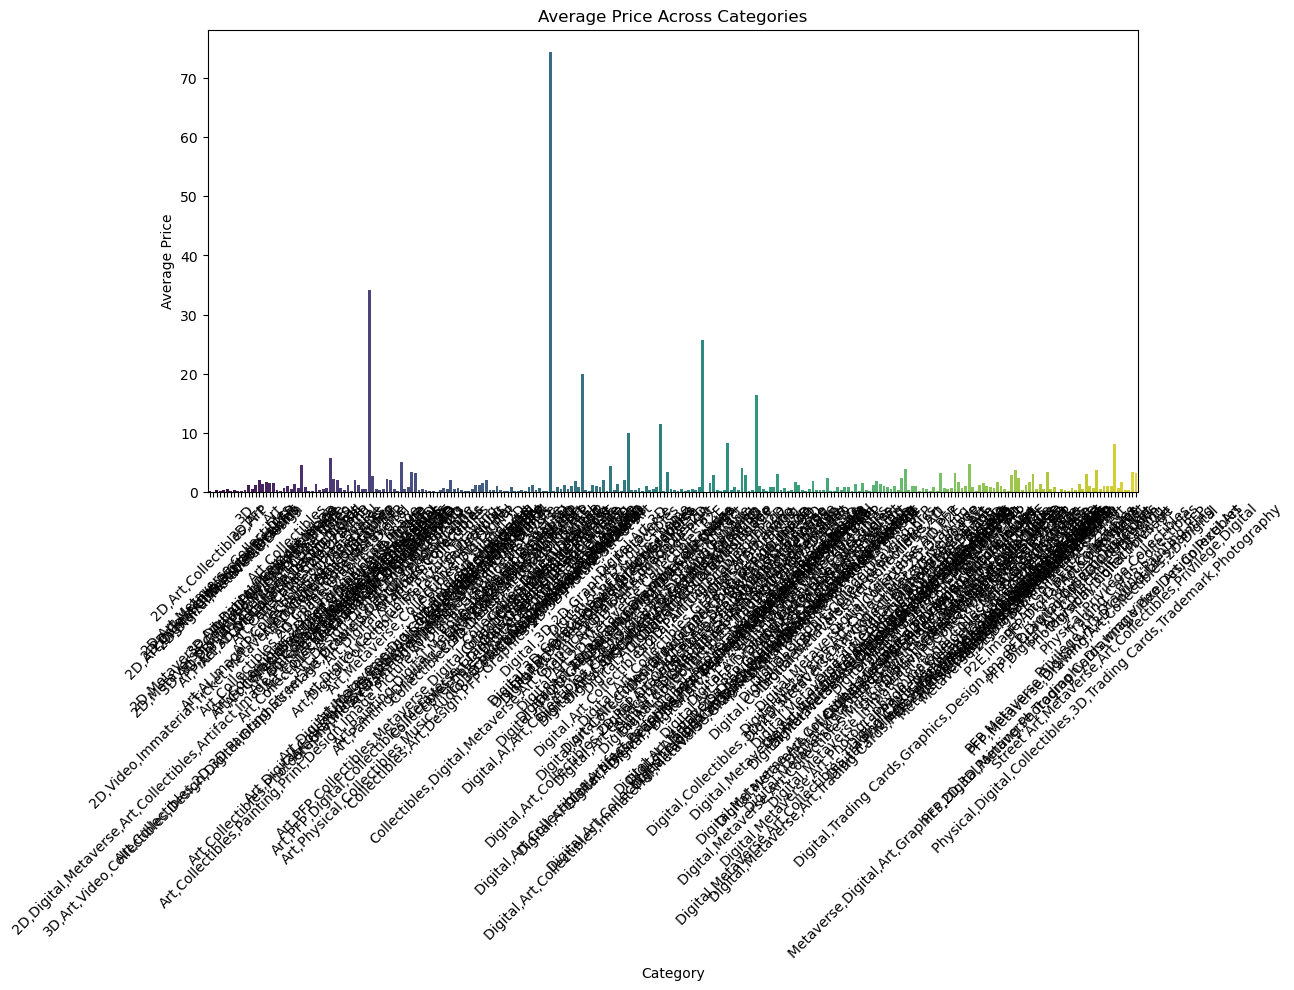

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by Category
category_summary = nft_data_cleaned.groupby('Category').agg({
    'Floor_Price': 'mean',
    'Market_Cap': 'mean',
    'Average_Price': 'mean'
}).reset_index()

# Plot the relationship between Floor Price and Market Cap by Category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=category_summary, x='Floor_Price', y='Market_Cap', hue='Category', s=100)
plt.title('Floor Price vs Market Cap (Aggregated by Category)')
plt.xlabel('Average Floor Price')
plt.ylabel('Average Market Cap')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the distribution of Average Price across Categories
plt.figure(figsize=(12, 6))
sns.barplot(data=category_summary, x='Category', y='Average_Price', palette='viridis')
plt.title('Average Price Across Categories')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


##### To make the visualizations more readable, we can focus on a subset of categories or sort them by specific metrics to reduce clutter and enhance clarity. Here's an updated approach:

##### Strategy
###### 1) Limit Categories: Use the top n categories based on metrics like average Market_Cap or Average_Price.
###### 2) Sort Data: Sort categories by their aggregated values for clearer interpretation.
###### 3)Enhance Visualization: Use larger fonts, better spacing, and remove redundant elements.

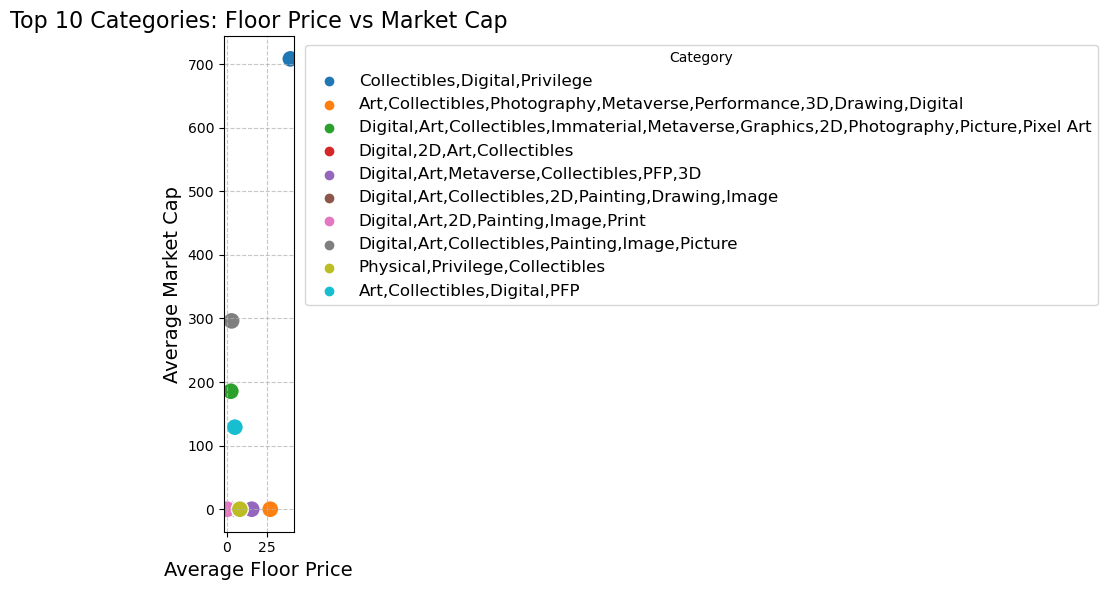

C:\Users\HP\AppData\Local\Temp\ipykernel_8020\1852658815.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


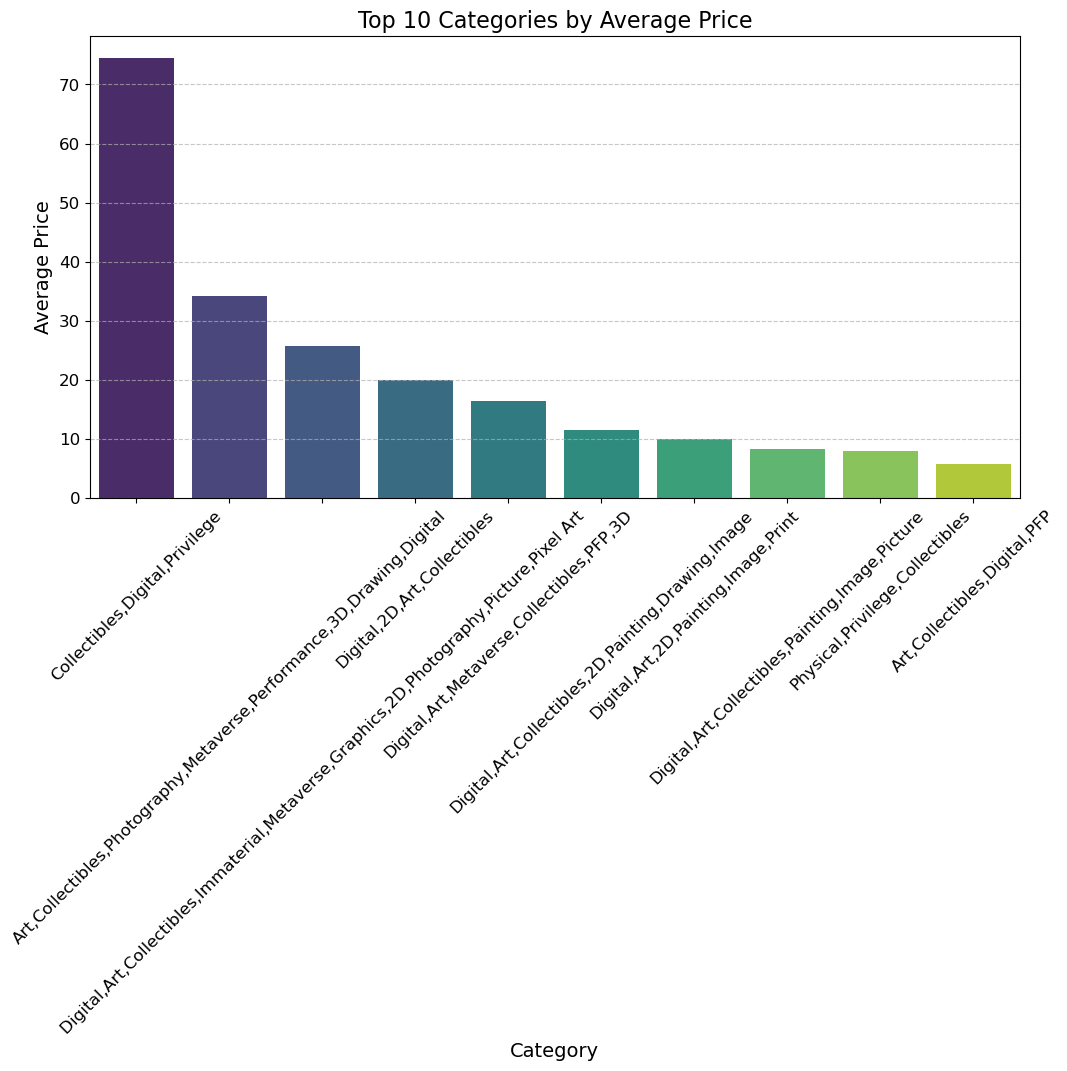

In [10]:
# Aggregate data by Category
category_summary = nft_data_cleaned.groupby('Category').agg({
    'Floor_Price': 'mean',
    'Market_Cap': 'mean',
    'Average_Price': 'mean'
}).reset_index()

# Sort by Average Price and select the top 10 categories
top_categories = category_summary.sort_values(by='Average_Price', ascending=False).head(10)

# Plot the relationship between Floor Price and Market Cap for top categories
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_categories, x='Floor_Price', y='Market_Cap', hue='Category', s=150, palette='tab10')
plt.title('Top 10 Categories: Floor Price vs Market Cap', fontsize=16)
plt.xlabel('Average Floor Price', fontsize=14)
plt.ylabel('Average Market Cap', fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the distribution of Average Price across the top 10 categories
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x='Category', y='Average_Price', palette='viridis')
plt.title('Top 10 Categories by Average Price', fontsize=16)
plt.ylabel('Average Price', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Step 4: Statistical Analysis - Correlation computed between sentiment proxy and NFT pricing.

In [11]:
from scipy.stats import pearsonr

# Correlation between sentiment proxy and NFT pricing
corr, p_value = pearsonr(nft_data_cleaned['Category_Code'], nft_data_cleaned['Average_Price'])
print(f'Correlation: {corr}, P-value: {p_value}')


Correlation: 0.03735541626372994, P-value: 0.36425229564109474


#### Step 5: Machine Learning Model - Random Forest model vs Linear Regression model.

Random Forest - Mean Squared Error: 4.766149208355415
Random Forest - R-squared: 0.54
Linear Regression - Mean Squared Error: 12.9536236601077
Linear Regression - R-squared: -0.24


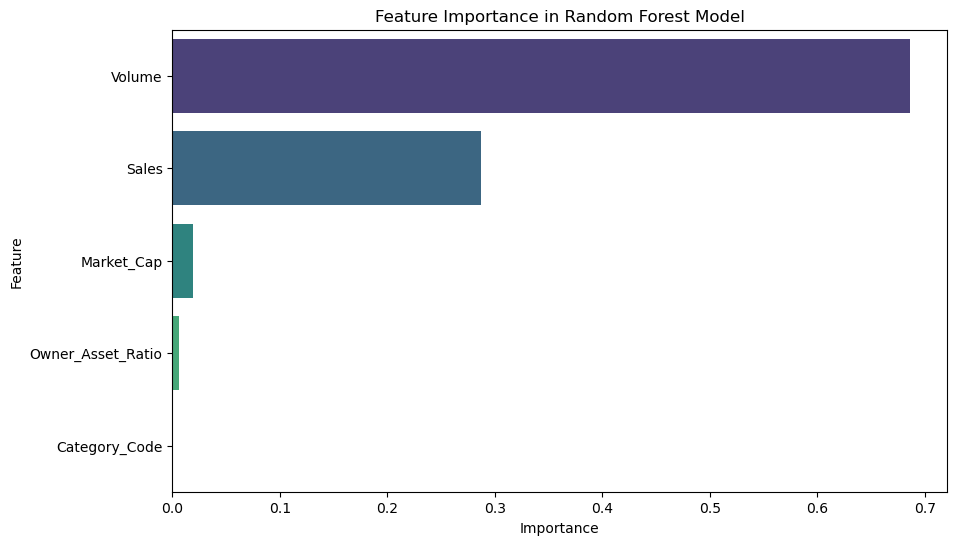

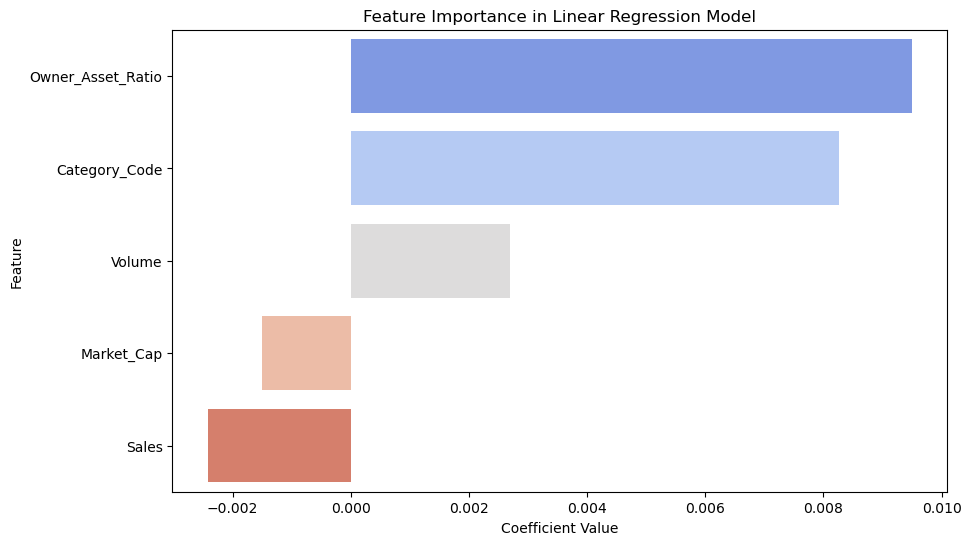

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection
X = nft_data_cleaned[['Category_Code', 'Volume', 'Market_Cap', 'Sales', 'Owner_Asset_Ratio']]
y = nft_data_cleaned['Average_Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

# Print Metrics
print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R-squared: {rf_r2:.2f}")
print(f"Linear Regression - Mean Squared Error: {lr_mse}")
print(f"Linear Regression - R-squared: {lr_r2:.2f}")

# Feature Importance for Random Forest
rf_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importances, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Feature importance for Linear Regression
lr_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_feature_importances, palette='coolwarm')
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [16]:
# Print metrics for comparison
print("=== Model Performance Comparison ===")
print(f"Random Forest - Mean Squared Error: {rf_mse:.2f}")
print(f"Random Forest - R-squared: {rf_r2:.2f}")
print(f"Linear Regression - Mean Squared Error: {lr_mse:.2f}")
print(f"Linear Regression - R-squared: {lr_r2:.2f}")

# Model Comparison
if rf_r2 > lr_r2:
    print("\nRandom Forest has better accuracy based on R-squared.")
else:
    print("\nLinear Regression has better accuracy based on R-squared.")

if rf_mse < lr_mse:
    print("Random Forest has better performance based on Mean Squared Error.")
else:
    print("Linear Regression has better performance based on Mean Squared Error.")

# Conclusion
if rf_r2 > lr_r2 and rf_mse < lr_mse:
    print("\nOverall, Random Forest performs better on this dataset.")
elif lr_r2 > rf_r2 and lr_mse < rf_mse:
    print("\nOverall, Linear Regression performs better on this dataset.")
else:
    print("\nThe performance of both models is comparable; consider additional metrics for deeper analysis.")


=== Model Performance Comparison ===
Random Forest - Mean Squared Error: 4.77
Random Forest - R-squared: 0.54
Linear Regression - Mean Squared Error: 12.95
Linear Regression - R-squared: -0.24

Random Forest has better accuracy based on R-squared.
Random Forest has better performance based on Mean Squared Error.

Overall, Random Forest performs better on this dataset.


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


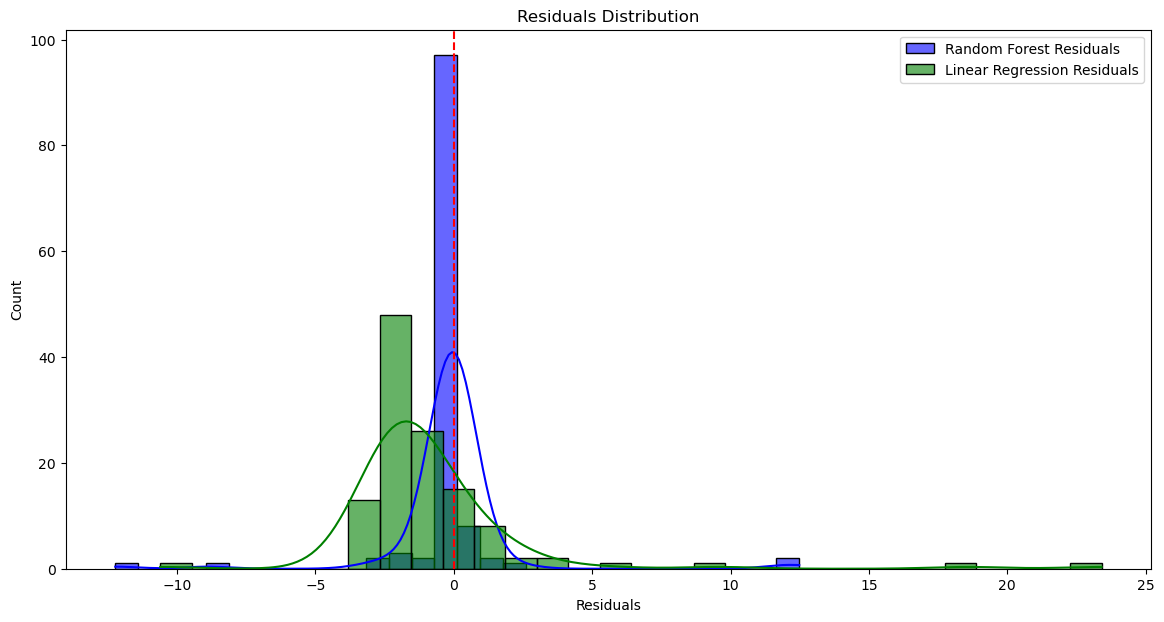

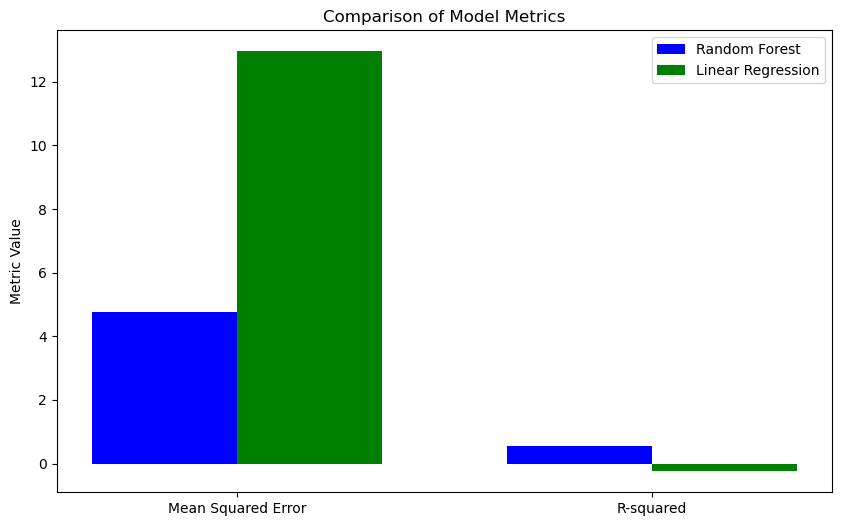

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Residual Plot
rf_residuals = y_test - rf_y_pred
lr_residuals = y_test - lr_y_pred

plt.figure(figsize=(14, 7))
sns.histplot(rf_residuals, kde=True, color="blue", label="Random Forest Residuals", bins=30, alpha=0.6)
sns.histplot(lr_residuals, kde=True, color="green", label="Linear Regression Residuals", bins=30, alpha=0.6)
plt.axvline(0, color="red", linestyle="--")
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.legend()
plt.show()

# Bar Chart for Metrics Comparison
metrics = ['Mean Squared Error', 'R-squared']
rf_metrics = [rf_mse, rf_r2]
lr_metrics = [lr_mse, lr_r2]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rf_metrics, width, label='Random Forest', color='blue')
plt.bar(x + width/2, lr_metrics, width, label='Linear Regression', color='green')
plt.xticks(x, metrics)
plt.title('Comparison of Model Metrics')
plt.ylabel('Metric Value')
plt.legend()
plt.show()
